In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date_result=session.query(measurement.date).order_by(measurement.date.desc()).first()
for result in recent_date_result:
    recent_date = result

recent_date

'2017-08-23'

In [10]:
data = engine.execute("SELECT * FROM measurement")
data.keys()

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.datetime.strptime(recent_date,"%Y-%m-%d")

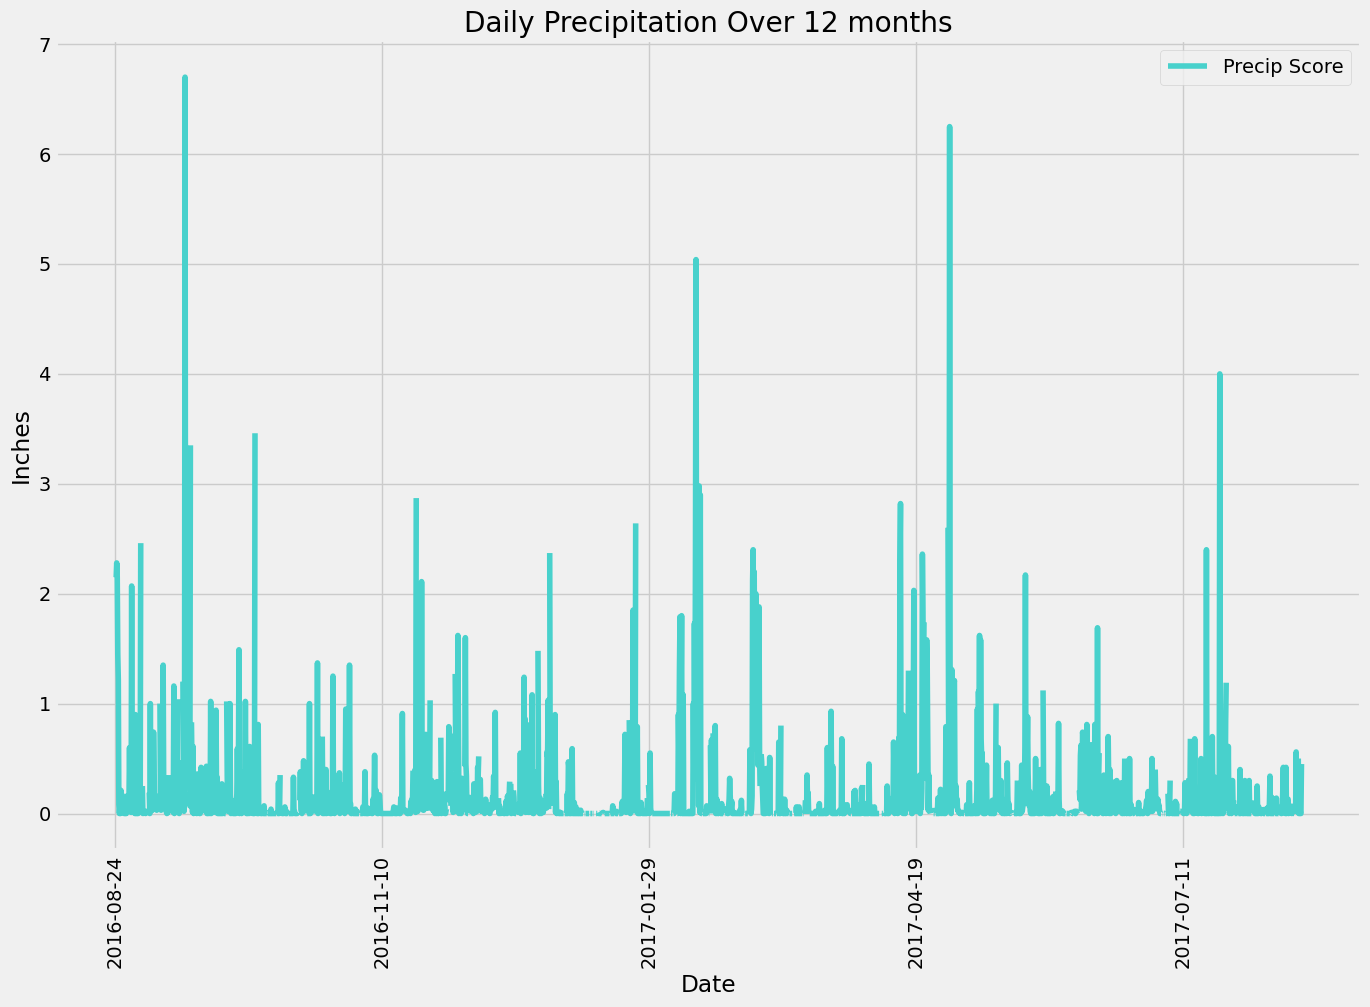

In [12]:
# Calculate the date one year from the last date in data set.
year_ago = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(measurement.date,measurement.prcp).filter(measurement.date > year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_scores = pd.DataFrame(last_year_data,columns=["Date","Precip Score"])

# Sort the dataframe by date
precip_scores = precip_scores.sort_values("Date")
precip_scores

# Use Pandas Plotting with Matplotlib to plot the data
precip_scores.plot(x='Date',y='Precip Score',kind='line',figsize=(15,10),title = 'Daily Precipitation Over 12 months',ylabel='Inches',legend=True,rot=90,color="mediumturquoise")

plt.savefig('\\Users\msmic\Downloads\hawaii_precip.png')
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_scores.describe()

,Precip Score
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Show keys
data = engine.execute("SELECT * FROM station")
data.keys()

RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])

In [15]:
# Design a query to calculate the total number stations in the dataset
station_num = session.query(station.station).group_by(station.station).count()
station_num

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(measurement.station,func.count(measurement.station)).\
           group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Show list ov the best station
best_station = stations[0][0]
best_station

'USC00519281'

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(measurement.tobs),func.avg(measurement.tobs),func.max(measurement.tobs)).\
                      filter(measurement.station == best_station).all()
temps

[(54.0, 71.66378066378067, 85.0)]

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temps = session.query(measurement.date,measurement.tobs).\
                  filter(measurement.date > year_ago).\
                  filter(measurement.station == best_station).\
                  group_by(measurement.date).all()
last_year_temps

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

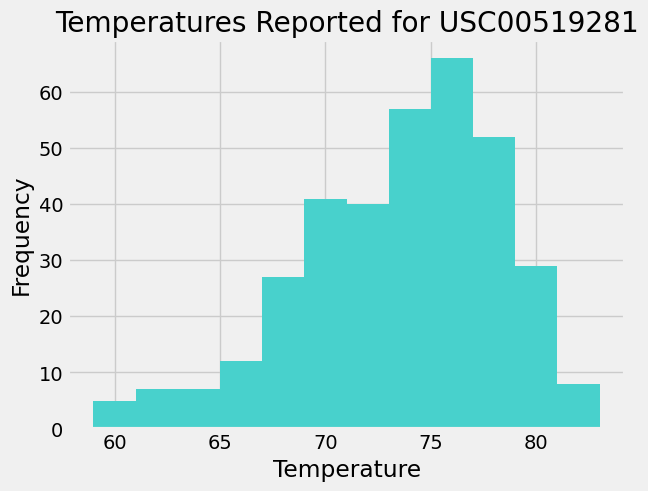

In [20]:
# Plot of best station
best_year_df = pd.DataFrame(last_year_temps,columns=["Date","Temperature"])
best_year_df.hist(bins=12, color="mediumturquoise")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperatures Reported for " + best_station)

plt.savefig('\\Users\msmic\Downloads\hawaii_best_station.png')
plt.show()

# Close session

In [21]:
# Close Session
session.close()